# Sylvie Fortier

# Time Series Analysis

In [2]:
import pandas as pd

from datetime import datetime
from datetime import timedelta
import datetime

import yfinance as yf
from pandas_datareader import data as pdr #for remote data access
pd.core.common.is_list_like = pd.api.types.is_list_like #check if the object is list-like
import pandas_datareader.data as web # extract data from various internet sources into a pandas DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

## Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.

In [3]:
yf.pdr_override()

In [4]:
# Download all stocks into a DF and show only the daily ADJUSTED CLOSE PRICE for all stocks

all_stocks_list = ['FB','MMM','IBM','AMZN']

all_stocks_df = yf.download(all_stocks_list, start=datetime.datetime(2016,4,1), 
                            end=datetime.datetime(2021,3,31))['Adj Close']

all_stocks_df.head()

[*********************100%***********************]  4 of 4 completed


AMZN          FB         IBM         MMM
Date                                                      
2016-03-31  593.640015  114.099998  121.448616  143.917099
2016-04-01  598.500000  116.059998  122.306641  144.694427
2016-04-04  593.190002  112.550003  121.945793  143.718414
2016-04-05  586.140015  112.220001  120.285851  143.208832
2016-04-06  602.080017  113.709999  120.301880  144.072510

## Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

In [5]:
# Use resample() to change the time interval to the frequency business month (BM) and 
# Use last() to show the last value of the BM instead of the monthly average which is the default

allstocks_monthend = all_stocks_df.resample(rule='BM', axis='index').last()

allstocks_monthend.head()

AMZN          FB         IBM         MMM
Date                                                      
2016-03-31  593.640015  114.099998  121.448616  143.917099
2016-04-29  659.590027  117.580002  117.030098  144.564835
2016-05-31  722.789978  118.809998  124.474747  146.344696
2016-06-30  715.619995  114.279999  122.887802  152.256943
2016-07-29  758.809998  123.940002  130.045120  155.073929

## Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

In [6]:
allstocks_monthend.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2016-03-31 to 2021-03-31
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    61 non-null     float64
 1   FB      61 non-null     float64
 2   IBM     61 non-null     float64
 3   MMM     61 non-null     float64
dtypes: float64(4)
memory usage: 2.4 KB


In [7]:
# Drop the first row (March 2016) to only analyze 60 months

allstocks_monthend.drop(allstocks_monthend.index[0], inplace=True)

In [8]:
# Check for NaN values

allstocks_monthend.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-04-29 to 2021-03-31
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [9]:
# Just in case let's drop any possible NaN values before plotting the graph

allstocks_monthend.dropna(inplace=True)

allstocks_monthend.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-04-29 to 2021-03-31
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


Text(0, 0.5, 'Autocorrelation')

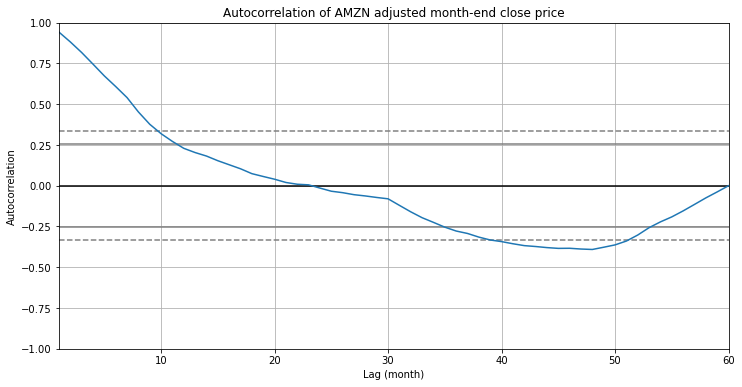

In [10]:
# A) Autocorrelation of the adjusted month-end close price for AMZN

plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(allstocks_monthend['AMZN'])

plt.title('Autocorrelation of AMZN adjusted month-end close price')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

# Quick analysis of AMZN

We see a strong positive autocorrelation (>0.75) for the past 3 months, medium positive autocorrelaton (0.50-0.75) between month 3 and month 7, and a weak positive autocorrelation (<0.50) between month 7 and month 22.
A positive autocorrelation means that both variables move in the same direction (one variable decreases as the other variable decreases, or one variable increases while the other increases).

We also see a weak negative autocorrelation (< -0.50) between month 22 and month 60. A negative autocorrelation means that both variables move in the opposite direction (one variable increases as the other decreases, and vice versa).

Overall, 0-3 months is the best predictor of future month-end close price for AMZN and could characterize it as little momentum stock because the past 3 months price seem to influence future price.
However, any data past 3 months (especially past month 10 that is below the statistically significant dotted line) should not be considered to make predictions as the autocorrelation is not strong enough. 


Text(0, 0.5, 'Autocorrelation')

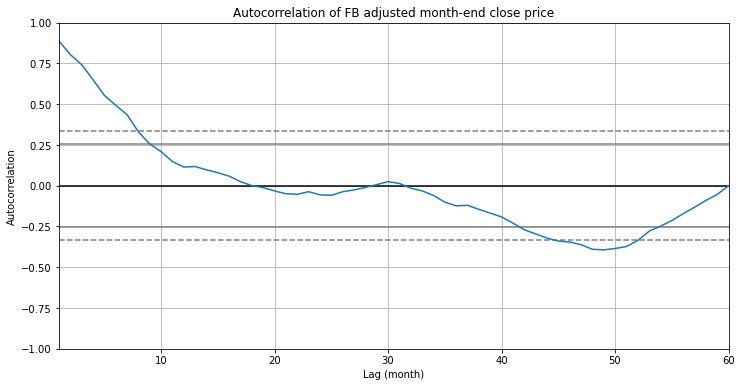

In [11]:
# B) Autocorrelation of the adjusted month-end close price for FB

plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(allstocks_monthend['FB'])

plt.title('Autocorrelation of FB adjusted month-end close price')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

# Quick analysis of FB

We see a strong positive autocorrelation (>0.75) for the past 2 months, medium positive autocorrelaton (0.50-0.75) between month 2 and month 6, and a weak positive autocorrelation (<0.50) between month 6 and month 18. A positive autocorrelation means that both variables move in the same direction (one variable decreases as the other variable decreases, or one variable increases while the other increases).

We also see a "somewhat null" (around 0) or weak negative autocorrelation (< -0.50) between month 18 and month 60. A negative autocorrelation means that both variables move in the opposite direction (one variable increases as the other decreases, and vice versa).

Overall, 0-2 months is the best predictor of future month-end close price for FB and could characterize it as little momentum stock because the past 2 months price seem to influence future price.
However, any data past 2 months (especially past month 8 that is below the statistically significant dotted line) should not be considered to make predictions as the autocorrelation is not strong enough.


Text(0, 0.5, 'Autocorrelation')

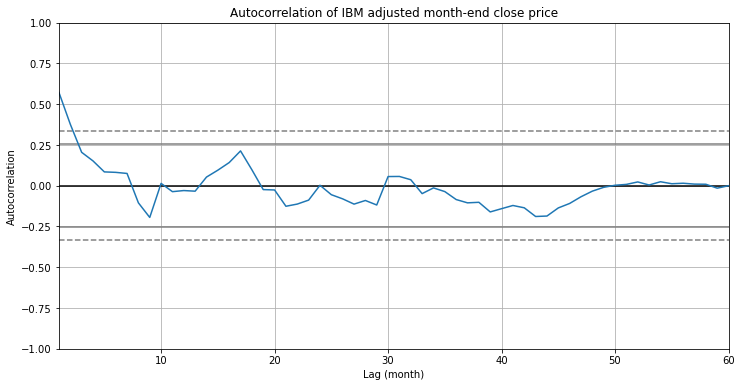

In [12]:
# C) Autocorrelation of the adjusted month-end close price for IBM

plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(allstocks_monthend['IBM'])

plt.title('Autocorrelation of IBM adjusted month-end close price')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

# Quick analysis of IBM

We don't see any strong or medium positive autocorrelation (>0.75) for the past 60 months; only a weak positive autocorrelation (<0.50) between month 0.5 and month 7, between month 13 and month 18, and between month 29 and month 32. A positive autocorrelation means that both variables move in the same direction (one variable decreases as the other variable decreases, or one variable increases while the other increases).

We also don't see any strong or medium negative autocorrelation (> -0.50) for the past 60 months; we only see a weak negative autocorrelation (< -0.50) between month 7 and month 13, between month 18 and month 29, and between month 32 and month 50. A negative autocorrelation means that both variables move in the opposite direction (one variable increases as the other decreases, and vice versa). 

Finally, we see a "somewhat null" autocorrelation (around 0) between month 50 and month 60. A "null" autocorrelation means there is no relationship between the variable's current value and its past values. 

Overall, since there is no strong positive or negative autocorrelation, it seems that there is no correlation between IBM current adjusted month-end close price and its past values and therefore should not be considered to make predictions.


Text(0, 0.5, 'Autocorrelation')

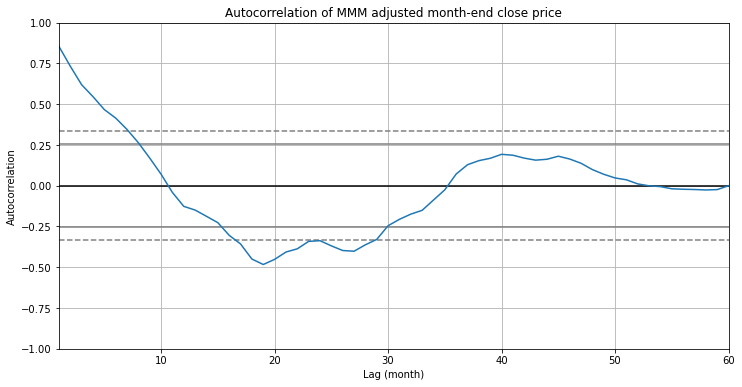

In [13]:
# D) Autocorrelation of the adjusted month-end close price for MMM

plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(allstocks_monthend['MMM'])

plt.title('Autocorrelation of MMM adjusted month-end close price')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

# Quick analysis of MMM

We see a strong positive autocorrelation (>0.75) for the past 1 month, medium positive autocorrelaton (0.50-0.75) between month 1 and month 4, and a weak positive autocorrelation (<0.50) between month 4 and month 11 and between month 35 and month 52. A positive autocorrelation means that both variables move in the same direction (one variable decreases as the other variable decreases, or one variable increases while the other increases).

We also see a weak negative autocorrelation (< -0.50) between month 11 and month 35. A negative autocorrelation means that both variables move in the opposite direction (one variable increases as the other decreases, and vice versa).

Finally we see a "somewhat null" autcorrelation (around 0) between month 52 and month 60. A "null" autocorrelation means there is no relationship between the variable's current value and its past values. 

Overall, the past month is the best predictor of future month-end close price for MMM.
However, any data past month 1 (especially past month 7 that is below the statistically significant dotted line) should not be considered to make predictions as the autocorrelation is not strong enough.


## Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.

In [14]:
# Rename DF to facilitate coding

df = allstocks_monthend
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-04-29 to 2021-03-31
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [15]:
# Calculate the monthly returns for each stock (Current$ - Previous$)

df['return_AMZN'] = df['AMZN'] - df['AMZN'].shift(1)
df['return_FB'] = df['FB'] - df['FB'].shift(1)
df['return_IBM'] = df['IBM'] - df['IBM'].shift(1)
df['return_MMM'] = df['MMM'] - df['MMM'].shift(1)

df.head()

AMZN          FB         IBM         MMM  return_AMZN  \
Date                                                                      
2016-04-29  659.590027  117.580002  117.030098  144.564835          NaN   
2016-05-31  722.789978  118.809998  124.474747  146.344696    63.199951   
2016-06-30  715.619995  114.279999  122.887802  152.256943    -7.169983   
2016-07-29  758.809998  123.940002  130.045120  155.073929    43.190002   
2016-08-31  769.159973  126.120003  129.747284  156.810089    10.349976   

            return_FB  return_IBM  return_MMM  
Date                                           
2016-04-29        NaN         NaN         NaN  
2016-05-31   1.229996    7.444649    1.779861  
2016-06-30  -4.529999   -1.586945    5.912247  
2016-07-29   9.660004    7.157318    2.816986  
2016-08-31   2.180000   -0.297836    1.736160

In [16]:
# To calculate the % return, we use the formula: (Current$ - Previous$) / Previous$ *100

df['%return_AMZN'] = (df['AMZN'] - df['AMZN'].shift(1)) / df['AMZN'].shift(1) *100
df['%return_FB'] = (df['FB'] - df['FB'].shift(1)) / df['FB'].shift(1) *100
df['%return_IBM'] = (df['IBM'] - df['IBM'].shift(1)) / df['IBM'].shift(1) *100
df['%return_MMM'] = (df['MMM'] - df['MMM'].shift(1)) / df['MMM'].shift(1) *100

df.head()

AMZN          FB         IBM         MMM  return_AMZN  \
Date                                                                      
2016-04-29  659.590027  117.580002  117.030098  144.564835          NaN   
2016-05-31  722.789978  118.809998  124.474747  146.344696    63.199951   
2016-06-30  715.619995  114.279999  122.887802  152.256943    -7.169983   
2016-07-29  758.809998  123.940002  130.045120  155.073929    43.190002   
2016-08-31  769.159973  126.120003  129.747284  156.810089    10.349976   

            return_FB  return_IBM  return_MMM  %return_AMZN  %return_FB  \
Date                                                                      
2016-04-29        NaN         NaN         NaN           NaN         NaN   
2016-05-31   1.229996    7.444649    1.779861      9.581702    1.046093   
2016-06-30  -4.529999   -1.586945    5.912247     -0.991987   -3.812809   
2016-07-29   9.660004    7.157318    2.816986      6.035326    8.452926   
2016-08-31   2.180000   -0.297836    1.736160      1.363975    1.758916   

            %return_IBM  %return_MMM  
Date                                  
2016-04-29          NaN          NaN  
2016-05-31     6.361311     1.231186  
2016-06-30    -1.274913     4.039946  
2016-07-29     5.824271     1.850153  
2016-08-31    -0.229025     1.119569

In [17]:
# Easier way of calculating the percentage change for the return:

df['pc_AMZN'] = df['AMZN'].pct_change(periods=1)*100
df['pc_FB'] = df['FB'].pct_change(periods=1)*100
df['pc_IBM'] = df['IBM'].pct_change(periods=1)*100
df['pc_MMM'] = df['MMM'].pct_change(periods=1)*100

df.head()

AMZN          FB         IBM         MMM  return_AMZN  \
Date                                                                      
2016-04-29  659.590027  117.580002  117.030098  144.564835          NaN   
2016-05-31  722.789978  118.809998  124.474747  146.344696    63.199951   
2016-06-30  715.619995  114.279999  122.887802  152.256943    -7.169983   
2016-07-29  758.809998  123.940002  130.045120  155.073929    43.190002   
2016-08-31  769.159973  126.120003  129.747284  156.810089    10.349976   

            return_FB  return_IBM  return_MMM  %return_AMZN  %return_FB  \
Date                                                                      
2016-04-29        NaN         NaN         NaN           NaN         NaN   
2016-05-31   1.229996    7.444649    1.779861      9.581702    1.046093   
2016-06-30  -4.529999   -1.586945    5.912247     -0.991987   -3.812809   
2016-07-29   9.660004    7.157318    2.816986      6.035326    8.452926   
2016-08-31   2.180000   -0.297836    1.736160      1.363975    1.758916   

            %return_IBM  %return_MMM   pc_AMZN     pc_FB    pc_IBM    pc_MMM  
Date                                                                          
2016-04-29          NaN          NaN       NaN       NaN       NaN       NaN  
2016-05-31     6.361311     1.231186  9.581702  1.046093  6.361311  1.231186  
2016-06-30    -1.274913     4.039946 -0.991987 -3.812809 -1.274913  4.039946  
2016-07-29     5.824271     1.850153  6.035326  8.452926  5.824271  1.850153  
2016-08-31    -0.229025     1.119569  1.363975  1.758916 -0.229025  1.119569

In [18]:
# Let's drop NaN values (April 2016) before plotting the graphs. This will give 59 observations to be plotted. 

df.dropna(inplace=True)
df.head()

AMZN          FB         IBM         MMM  return_AMZN  \
Date                                                                      
2016-05-31  722.789978  118.809998  124.474747  146.344696    63.199951   
2016-06-30  715.619995  114.279999  122.887802  152.256943    -7.169983   
2016-07-29  758.809998  123.940002  130.045120  155.073929    43.190002   
2016-08-31  769.159973  126.120003  129.747284  156.810089    10.349976   
2016-09-30  837.309998  128.270004  129.722809  154.176788    68.150024   

            return_FB  return_IBM  return_MMM  %return_AMZN  %return_FB  \
Date                                                                      
2016-05-31   1.229996    7.444649    1.779861      9.581702    1.046093   
2016-06-30  -4.529999   -1.586945    5.912247     -0.991987   -3.812809   
2016-07-29   9.660004    7.157318    2.816986      6.035326    8.452926   
2016-08-31   2.180000   -0.297836    1.736160      1.363975    1.758916   
2016-09-30   2.150002   -0.024475   -2.633301      8.860319    1.704727   

            %return_IBM  %return_MMM   pc_AMZN     pc_FB    pc_IBM    pc_MMM  
Date                                                                          
2016-05-31     6.361311     1.231186  9.581702  1.046093  6.361311  1.231186  
2016-06-30    -1.274913     4.039946 -0.991987 -3.812809 -1.274913  4.039946  
2016-07-29     5.824271     1.850153  6.035326  8.452926  5.824271  1.850153  
2016-08-31    -0.229025     1.119569  1.363975  1.758916 -0.229025  1.119569  
2016-09-30    -0.018864    -1.679293  8.860319  1.704727 -0.018864 -1.679293

Text(0, 0.5, 'Autocorrelation')

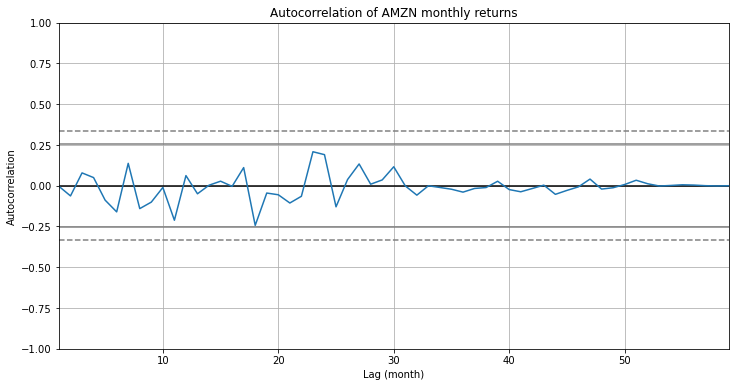

In [19]:
# Plot the autocorrelation of the monthly returns for each stock.

plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(df['return_AMZN'])

plt.title('Autocorrelation of AMZN monthly returns')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

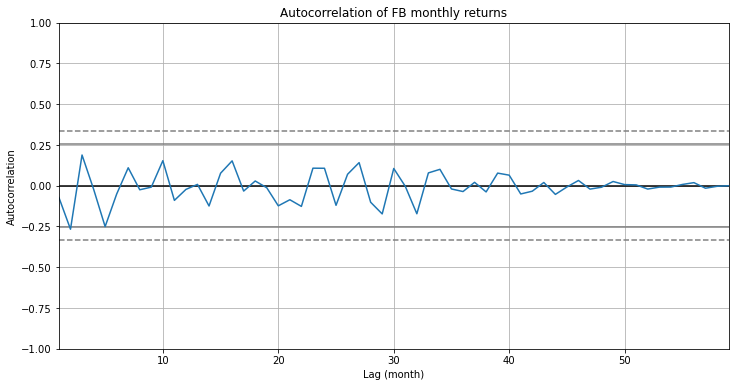

In [20]:
plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(df['return_FB'])

plt.title('Autocorrelation of FB monthly returns')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

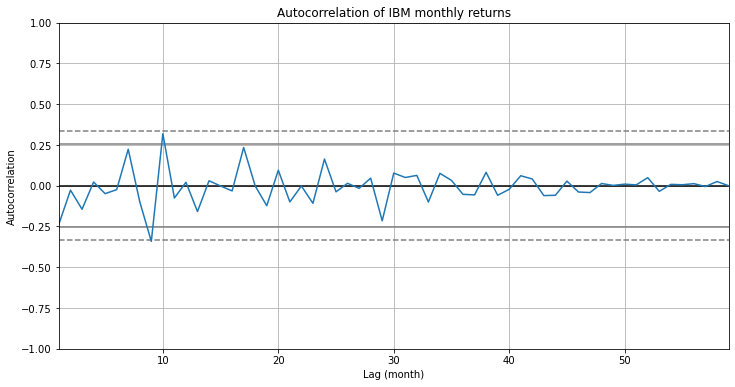

In [21]:
plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(df['return_IBM'])

plt.title('Autocorrelation of IBM monthly returns')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

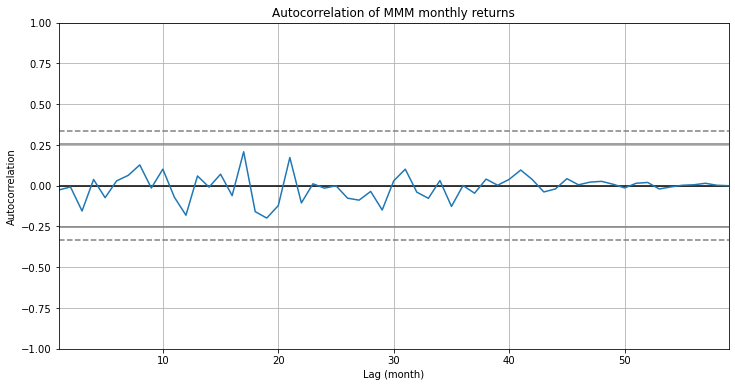

In [22]:
plt.figure(figsize=(12,6))

pd.plotting.autocorrelation_plot(df['return_MMM'])

plt.title('Autocorrelation of MMM monthly returns')
plt.xlabel('Lag (month)')
plt.ylabel('Autocorrelation')

# Are the returns autocorrelated? Provide short explanation.

For all stocks, the blue lines lie between the 2 statistically significant dotted lines and display a very weak postive or negative autocorrelation. Therefore, we could say that there is not a lot of autocorrelation momemtum in the returns themselves as compared to what seen in the adjusted month-end close price and as a result the current monthly returns don't seem to have a relationship with their past values.

## Combine all 4 time series (returns) into a single DataFrame.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2016-05-31 to 2021-03-31
Freq: BM
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AMZN          59 non-null     float64
 1   FB            59 non-null     float64
 2   IBM           59 non-null     float64
 3   MMM           59 non-null     float64
 4   return_AMZN   59 non-null     float64
 5   return_FB     59 non-null     float64
 6   return_IBM    59 non-null     float64
 7   return_MMM    59 non-null     float64
 8   %return_AMZN  59 non-null     float64
 9   %return_FB    59 non-null     float64
 10  %return_IBM   59 non-null     float64
 11  %return_MMM   59 non-null     float64
 12  pc_AMZN       59 non-null     float64
 13  pc_FB         59 non-null     float64
 14  pc_IBM        59 non-null     float64
 15  pc_MMM        59 non-null     float64
dtypes: float64(16)
memory usage: 7.8 KB


In [24]:
# There is no NaN values but just in case let's drop any possible NaN values before plotting the scatter plot

df.dropna(inplace=True)

In [25]:
# Let's create a smaller DF (df2) with only necessary variables for futher analysis

df2 = df[['return_AMZN', 'return_FB', 'return_IBM', 'return_MMM']]
df2.head()

return_AMZN  return_FB  return_IBM  return_MMM
Date                                                      
2016-05-31    63.199951   1.229996    7.444649    1.779861
2016-06-30    -7.169983  -4.529999   -1.586945    5.912247
2016-07-29    43.190002   9.660004    7.157318    2.816986
2016-08-31    10.349976   2.180000   -0.297836    1.736160
2016-09-30    68.150024   2.150002   -0.024475   -2.633301

In [26]:
df2.corr()

return_AMZN  return_FB  return_IBM  return_MMM
return_AMZN     1.000000   0.615635    0.494500    0.349024
return_FB       0.615635   1.000000    0.403369    0.335204
return_IBM      0.494500   0.403369    1.000000    0.629404
return_MMM      0.349024   0.335204    0.629404    1.000000

array([[<AxesSubplot:xlabel='return_AMZN', ylabel='return_AMZN'>,
        <AxesSubplot:xlabel='return_FB', ylabel='return_AMZN'>,
        <AxesSubplot:xlabel='return_IBM', ylabel='return_AMZN'>,
        <AxesSubplot:xlabel='return_MMM', ylabel='return_AMZN'>],
       [<AxesSubplot:xlabel='return_AMZN', ylabel='return_FB'>,
        <AxesSubplot:xlabel='return_FB', ylabel='return_FB'>,
        <AxesSubplot:xlabel='return_IBM', ylabel='return_FB'>,
        <AxesSubplot:xlabel='return_MMM', ylabel='return_FB'>],
       [<AxesSubplot:xlabel='return_AMZN', ylabel='return_IBM'>,
        <AxesSubplot:xlabel='return_FB', ylabel='return_IBM'>,
        <AxesSubplot:xlabel='return_IBM', ylabel='return_IBM'>,
        <AxesSubplot:xlabel='return_MMM', ylabel='return_IBM'>],
       [<AxesSubplot:xlabel='return_AMZN', ylabel='return_MMM'>,
        <AxesSubplot:xlabel='return_FB', ylabel='return_MMM'>,
        <AxesSubplot:xlabel='return_IBM', ylabel='return_MMM'>,
        <AxesSubplot:xlabel='return_M

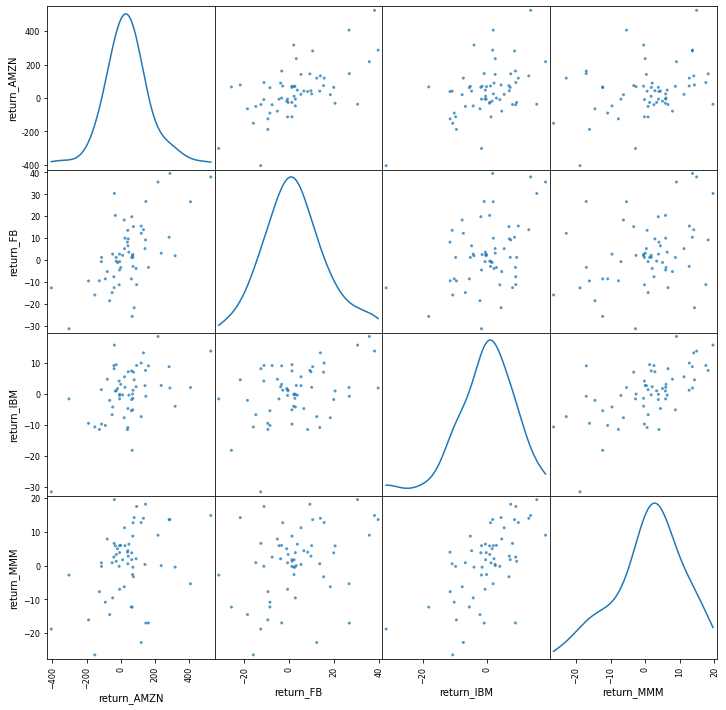

In [27]:
# Create a scatter matrix with Pandas

pd.plotting.scatter_matrix(df2, figsize=(12,12), alpha=0.75, diagonal='kde')

# Is there any correlation?

Although it's not straight forward to visualize correlations between the returns of all pairs of stocks, we can see that there is no negative correlation between stocks and as a result correlations are positive or not existent. 

There is no clear visual linear relationship between AMZN & MMM and between FB & MMM.

However, a visual positive correlation seems to exist between AMZN & FB, between IBM & MMM, and to some extent between AMZN & IBM and between FB & IBM.
